
# Problemas de optimización en el modelado de materia oscura galáctica
### Marina Estévez Almenzar
## Trabajo Fin de Grado
## Doble Grado en Ingeniería Informática y Matemáticas
### Tutores: Óscar Sánchez Romero y Pedro A. García Sánchez


---

## Índice
* Introducción
    * El problema astrofísico: el modelado de las masa de materia oscura galáctica
* Parte matemática
    * Definición del problema de minimización
    * Reducción paramétrica
* Parte informática
    * Algoritmo de reducción del intervalo de búsqueda
    * Algoritmo de minimización de la función objetivo
* Conclusiones
    * Análisis de los resultados obtenidos
    * Vías futuras

---

---
# Introducción
## El modelado de la masa de materia oscura galáctica
### ¿Cómo surge la teoría de la existencia de materia oscura? Paradoja de las curvas de rotación  
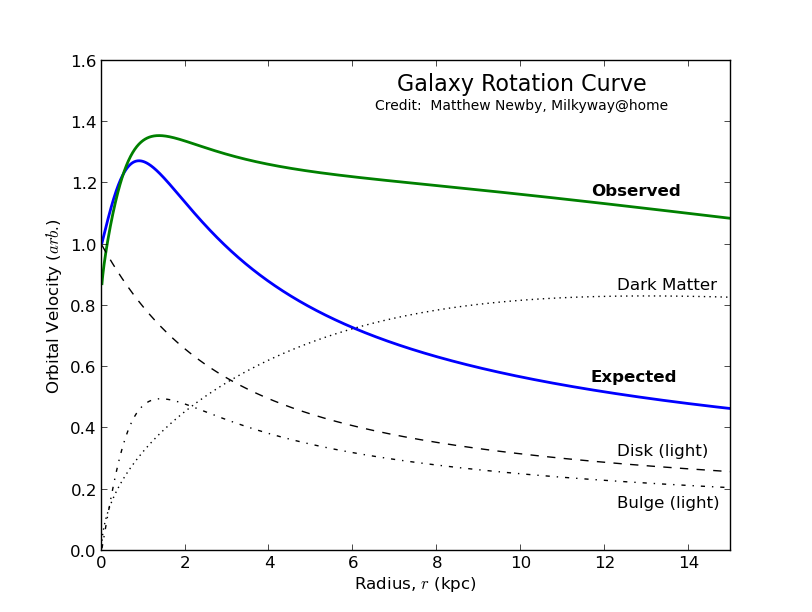  

---

---
### Distribución de masa esférica y velocidad circular  
  

<div class="row">
  <div class="column" style="float: left;width: 45%;padding: 5px">
    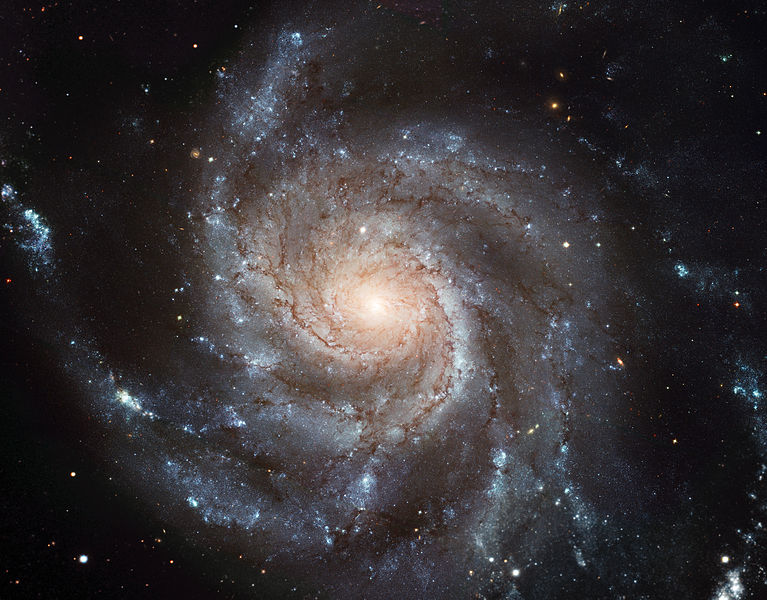
  </div>
  <div class="column" style="float: left;width: 45%;padding: 5px">
    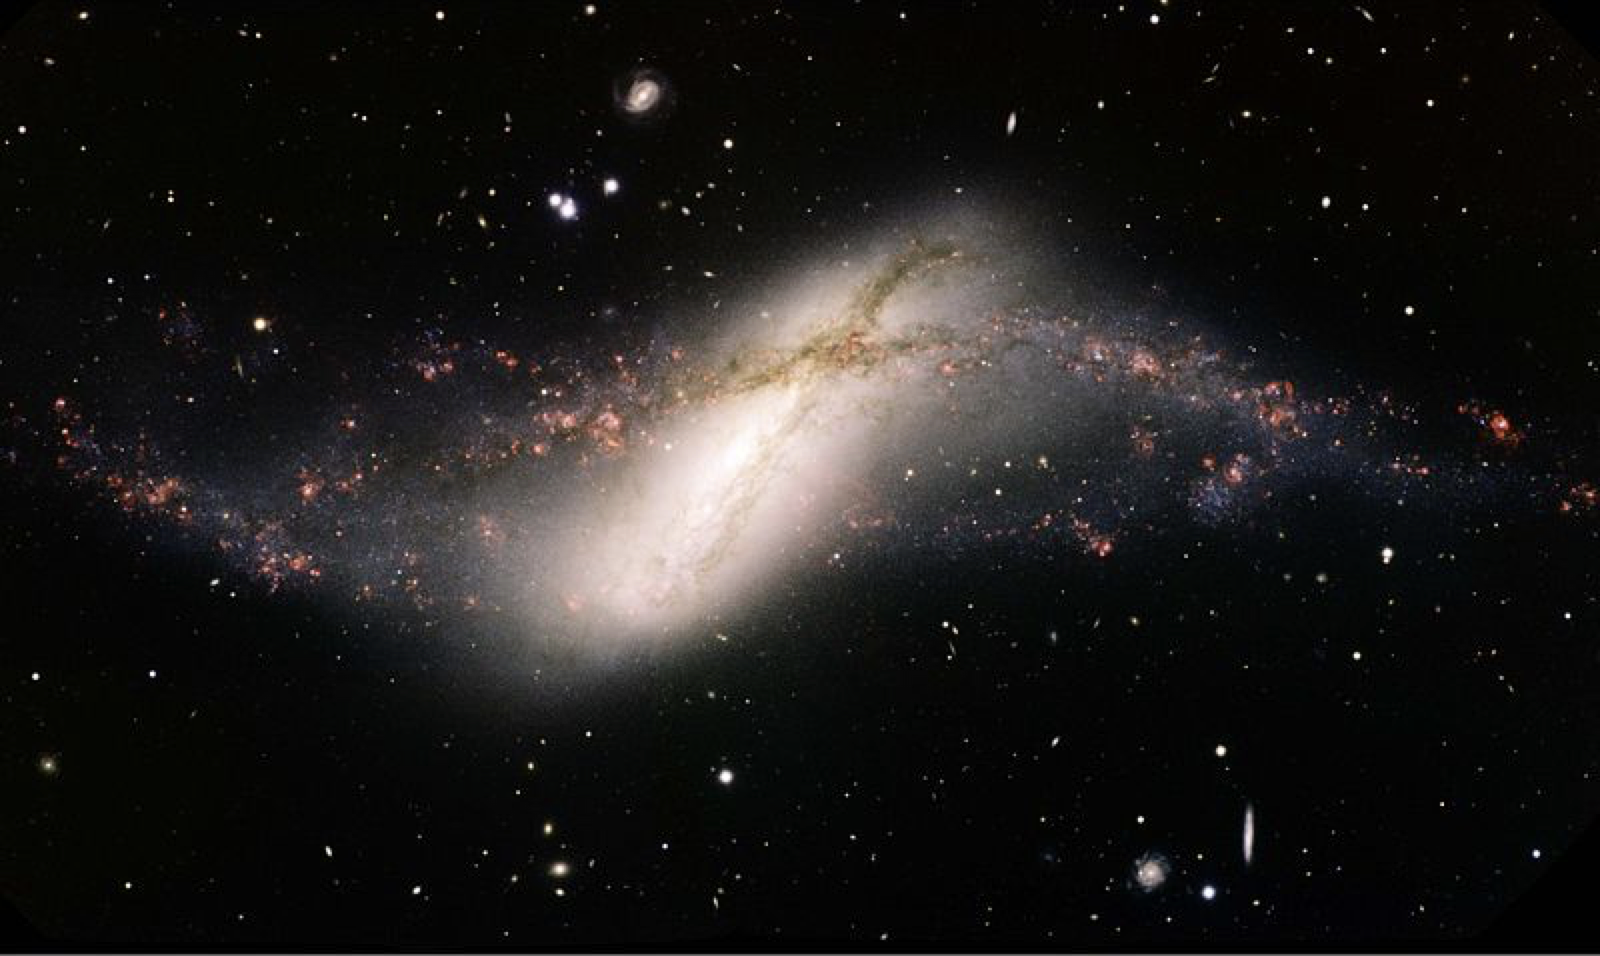
  </div>
</div>

$$V^2(r)=\frac{GM(r)}{r},$$
donde $G$ es la constante de gravitación universal y $M(r)$ es la masa total contenida en la esfera de radio $r$, y viene definida por 
$$M(r) = \int_{W_r}\rho(\textbf{p})\,d\textbf{p},$$ 
donde $\rho$ es la función densidad de masa y $W_r\subseteq\mathbb{R}^3$ es el volumen encerrado por una esfera de radio $r$.  

---

---
### Componentes de una galaxia
* Disco
    * Estrellas jóvenes
    * Gas
    * Polvo
* Bulbo
    * Estrellas viejas
* Halo
    * Materia oscura  
  
Podemos considerar la fuerza de atracción que genera la galaxia como una suma de fuerzas ejercidas por cada una de sus componentes, e igualmente para la velocidad circular, que puede reescribirse en términos de las velocidades asociadas a las diferentes componentes galácticas:
$$ V^2(r) = V_{bulbo} ^2(r)+V_{gas} ^2(r)+V_{estelar} ^2(r)+V_{halo} ^2(r) $$
En adelante supondremos que la componente bariónica está fijada, y nos centraremos en la velocidad circular debida a la materia oscura.  

---

---
### Perfiles de densidad de materia oscura
### $$\rho_{halo}(r) = \rho_0 \rho(sr)$$
* $\rho_{ISO}(r) = \frac{\rho_0}{(1+(rs)^2)}$
* $\rho_{BUR}(r) = \frac{\rho_0}{(1+rs)(1+(rs)^2)}$
* $\rho_{NFW}(r) = \frac{\rho_0}{rs(1+rs)^2}$
* $\rho_{EIN}(r;\,n) = \rho_0\exp{[-(rs)^\frac{1}{n}]}$
* $\rho_{HERN}(r;\,\alpha,\beta,\gamma) = \rho_0\frac{1}{(rs)^\alpha(1+(sr)^\beta)^\gamma}$  

$$M(r) = \int_{W_r}\rho_{halo}(\textbf{p})\,d\textbf{p},$$ 
donde, recordemos, $W_r\subseteq\mathbb{R}^3$ es el volumen encerrado por una esfera de radio $r$.  

Mediante el cambio a coordenadas esféricas  

$$\begin{cases} x_1 = z\sin{\theta}\cos{\phi}, \\ x_2 = z\sin{\theta}\sin{\phi}, \\ x_3 = z\cos{\theta},
\end{cases}$$
obtenemos la nueva expresión de la masa de materia oscura $M(r)$  

$$M(r) = 4\pi\rho_{0}\int_{0}^{r}z^2\rho(sz)\,dz = 4\pi \int_{0}^{r}z^2\rho_{halo}(z)\,dz.$$  

---

---
# Parte matemática

Dado un conjunto de $N$ datos $(V_i, r_i, \sigma_i)$ con $i=1, 2, ..., N$, definimos la función objetivo  

$$\chi^2 = \frac{1}{N-\nu}\sum_{i=1}^{N}\frac{(V_i-V(r_i))}{\sigma_i^2}$$  

donde $V(r_i) = \sqrt{V_{b}^2(r_i)+V_{halo}^2(r_i)}$, donde 
$$V_{b}^2(r_i) = V_{bulbo} ^2(r_i)+V_{gas} ^2(r_i)+V_{estelar} ^2(r_i),$$   
$$V_{halo}^2(r_i) = \frac{GM(r)}{r}$$  
con 
$$M(r) = 4\pi \int_{0}^{r_i}z^2\rho_{halo}(z)\,dz.$$  

---

---

Si definimos el producto escalar ponderado 

$$\langle u,v\rangle_{\sigma} = \sum_{i=1}^{N}\frac{u_iv_i}{(N-\nu)\sigma^2_i} \quad \forall u,v \in \mathbb{R}^N,$$ 

podemos expresar  

$$\chi^2 = \langle \textbf{V}-V(r), \textbf{V}-V(r) \rangle_{\sigma},$$ 

para luego usar las propiedades estándar de dicho producto y expresar  

$$\chi^2 = \langle \textbf{V},\textbf{V}\rangle_\sigma + \langle V^{\circ 2}_{b}(\textbf{r}),\textbf{e}\rangle_\sigma -2\langle \textbf{V},V(\textbf{r})\rangle_\sigma + \langle V^{\circ 2}_{halo}(\textbf{r}),\textbf{e}\rangle_\sigma$$  

---

---

### Definición del problema de minimización
Dados $\textbf{r}$, $\textbf{V}$, $V_{b}(\textbf{r})$ y un perfil de densidad de halo $\rho$, consideramos el siguiente problema de ajuste  

$$\min\{ \chi^2(s,\rho_0)\,|\,\rho_0 \in [0,\infty),\,s \in (0,\infty)\}.$$  

A continuación probaremos la equivalencia de este problema con un problema de ajuste reducido en el que es posible considerar un único parámetro de ajuste. Notemos  

$$W^s(r):= \frac{4\pi G}{r}\int_0^r z^2\rho(sz)\,dz = \frac{V_{halo}^2}{\rho_0}.$$  

---

---

### Teorema
Supongamos que nuestro conjunto de datos $(V_i,r_i,\sigma_i)$ satisface las condiciones siguientes
* $\textbf{r} > 0$,
* para cualquier $r > 0$, $W^s(r)$ es finito y estrictamente positivo,
* $\textbf{V}\geqslant 0$ no es idénticamente nula,
* $V_{b}(\textbf{r}) \geqslant 0$.  

Entonces el problema de ajuste $\min\{ \chi^2(s,\rho_0)\,|\,\rho_0 \in [0,\infty),\,s \in (0,\infty)\}$ es equivalente al problema  

$$\min\Big\{\varphi(s):=\chi^2(s,\rho_0(s))\,\Big|\,s\in(0,\infty)\Big\},$$  
donde la función $\rho_0(s)$ se define en la siguiente Proposición.  

---

<div class="row">
  <div class="column" style="float: left;width: 49%;padding: 0px">
    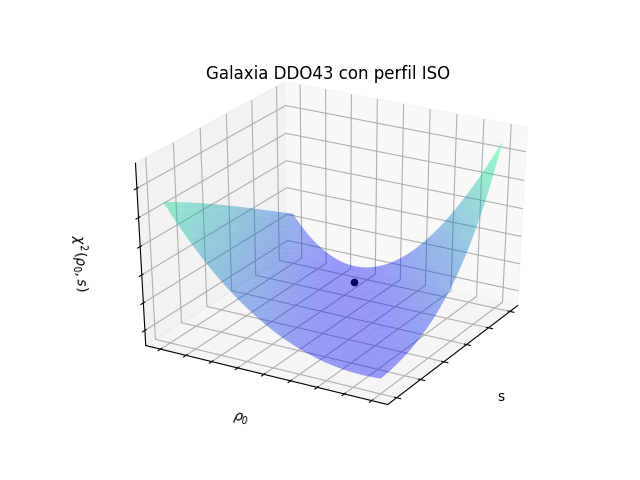
  </div>
  <div class="column" style="float: left;width: 49%;padding: 0px">
    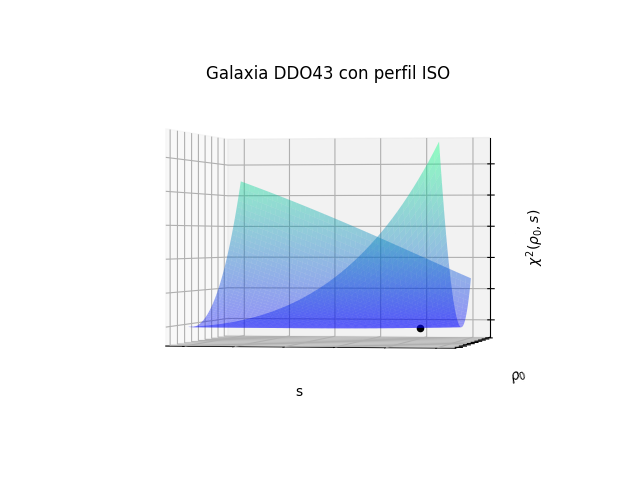
  </div>
</div>
<div class="row">
  <div class="column" style="float: left;width: 49%;padding: 0px">
    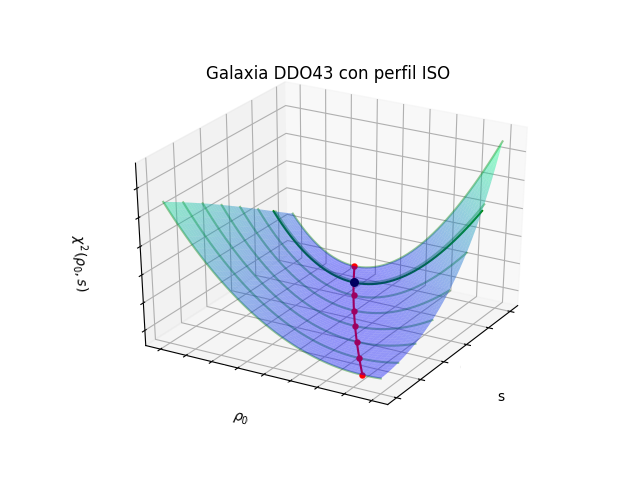
  </div>
  <div class="column" style="float: left;width: 49%;padding: 0px">
    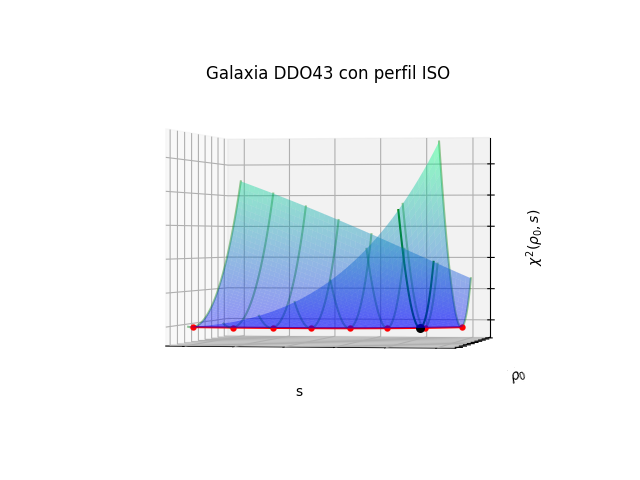
  </div>
</div>

### Proposición

Supongamos que se cumplen las hipótesis del Teorema anterior. Entonces, para cualquier $s>0$, la función $\chi^2(s, \cdot): \mathbb{R}_0^+\rightarrow \mathbb{R}$ alcanza su mínimo valor en un único punto $ \rho_0 = \rho_0(s)$. Es más, si fijamos $s\in\mathbb{R}^+$, entonces
* $\rho_0(s)=0$ si y sólo si $$\Big\langle\textbf{V},\frac{W^s(\textbf{r})}{V_{b}(\textbf{r})}\Big\rangle_\sigma \leqslant \langle W^s(\textbf{r}),\textbf{e} \rangle_\sigma.$$  
* Si no se cumple la ecuación anterior, entonces $\rho_0(s)>0$ es la única solución de la ecuación normal  
$$\Bigg\langle \textbf{V},\frac{W^s(\textbf{r})}{\Big(V_{b}^{\circ2}(\textbf{r})+\rho_0W^s(\textbf{r})\Big)^{\circ\frac{1}{2}}} \Bigg\rangle_\sigma = \langle W^s(\textbf{r}),\textbf{e}\rangle_\sigma.$$
Es más, si $V_{b}^{\circ2}(\textbf{r}) = \textbf{0}$, se cumple que $$\rho_0(s) = \Bigg(\frac{\Big\langle\textbf{V},(W^s(\textbf{r}))^{\circ\frac{1}{2}}\Big\rangle_\sigma}{\langle W^s(\textbf{r}),\textbf{e}\rangle_\sigma}\Bigg)^2 \, \forall s>0;$$ en caso contrario se cumple que $$0 < \rho_0(s) < \Bigg(\frac{\Big\langle\textbf{V},(W^s(\textbf{r}))^{\circ\frac{1}{2}}\Big\rangle_\sigma}{\langle W^s(\textbf{r}),\textbf{e}\rangle_\sigma}\Bigg)^2.$$